## Computer vision
### Image matching

In [1]:
import numpy as np
import cv2 as cv
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
base_folder = './' # change this on your machine
images = glob.glob(os.path.join(base_folder, "*.jpg")) 
print(images)

['.\\cathedral_img1.jpg', '.\\cathedral_img2.jpg', '.\\template_math.jpg', '.\\test_image_math.jpg']


In [5]:
print(cv.__version__)
# sift doesn't work with version 4.1.2 (is patented)
# in order to make sift working uninstall opencv and install version 3.4.2.16 with opencv-contrib
# pip install opencv-python==3.4.2.16
# pip install opencv-contrib-python==3.4.2.16

3.4.2


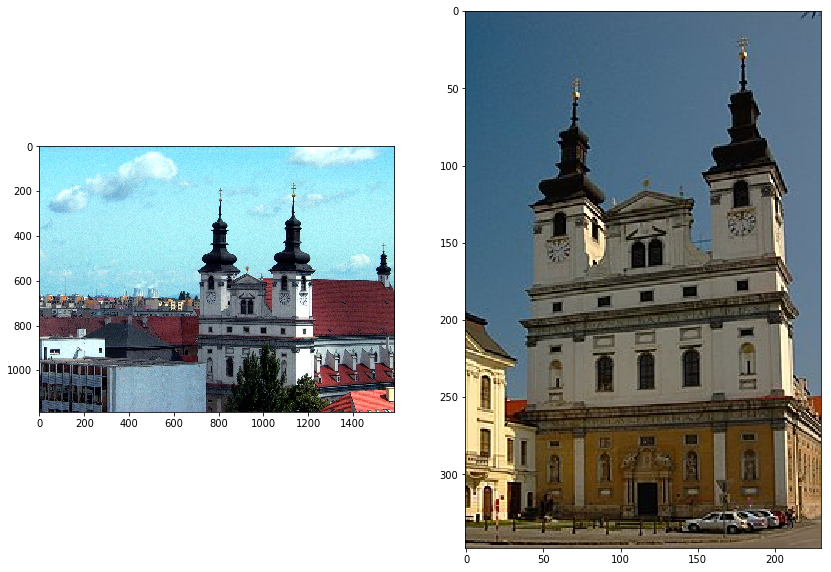

(1187, 1586, 3)
(348, 230, 3)


In [6]:
img1 = cv.imread(base_folder + 'cathedral_img1.jpg')
img2 = cv.imread(base_folder + 'cathedral_img2.jpg')

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.figure(figsize=(14, 14))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

print(img1.shape)
print(img2.shape)

We will perform **image matching** based on their local features, a.k.a. interest points.

A local image feature is a tiny patch in the image that's invariant to image scaling, rotation and change in illumination. It's like the tip of a tower, or the corner of a window in the image above. Unlike a random point on the background (sky) in the image above, the tip of the tower can be precise detected in most images of the same scene. It is geometricly (translation, rotation, ...) and photometricly (brightness, exposure, ...) invariant.

In [7]:
# create ORB object
orb = cv.ORB_create(nfeatures=5000)
# get the keypoints and the corresponding descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
print('(1) num of keypoints =', len(kp1))
print('(1) num of descriptors =', len(des1))
print('(1) the dimension of one descriptor is', len(des1[1]))
print('(1) the second descriptor is', des1[1])
kp2, des2 = orb.detectAndCompute(img2, None) 
print('(2) num of keypoints =', len(kp2))
print('(2) num of descriptors =', len(des2))

(1) num of keypoints = 5000
(1) num of descriptors = 5000
(1) the dimension of one descriptor is 32
(1) the second descriptor is [  5 120 129 181 133  79 238  93  30 226  80  78 190 157  81 172 157 105
  18  95 199 244 216 130 133 158  29  32  73  59 145 152]
(2) num of keypoints = 1898
(2) num of descriptors = 1898


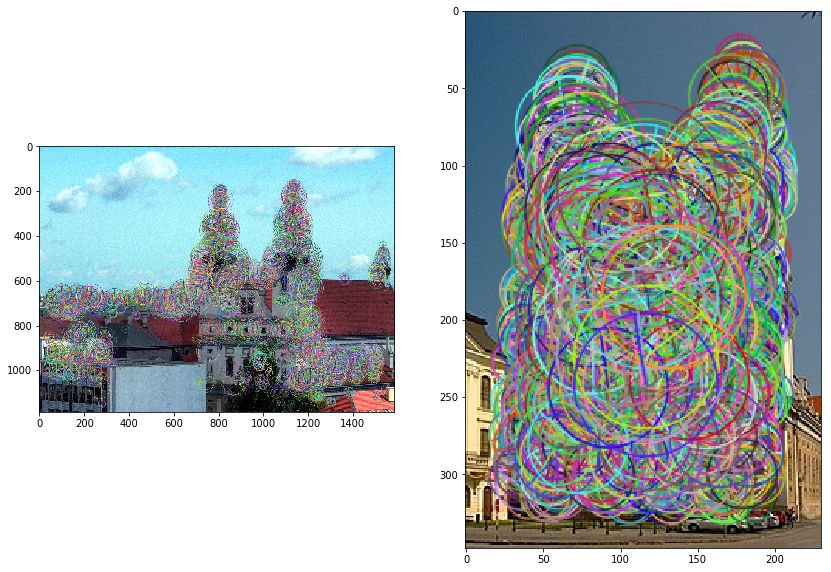

In [8]:
# drawing keypoints
drawing_img1 = np.copy(img1)
cv.drawKeypoints(img1, kp1, drawing_img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# drawing keypoints
drawing_img2 = np.copy(img2)
cv.drawKeypoints(img2, kp2, drawing_img2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(drawing_img1)
plt.subplot(1, 2, 2)
plt.imshow(drawing_img2)
plt.show()

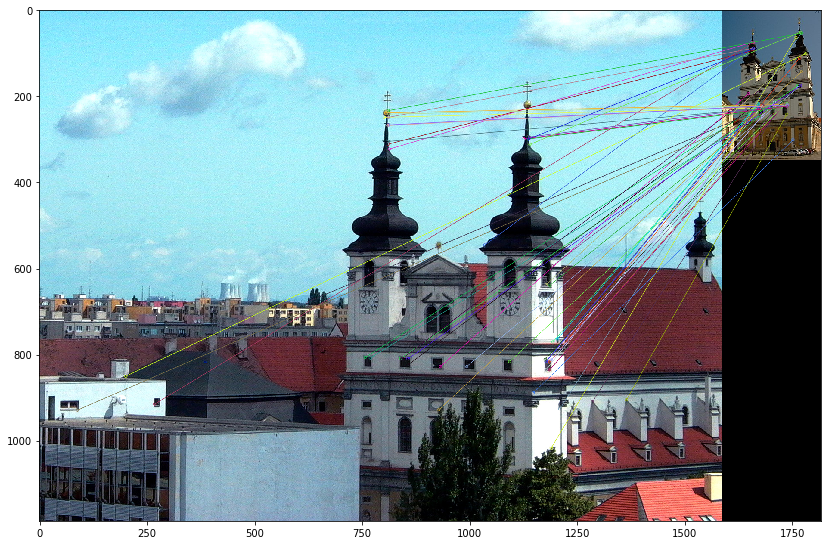

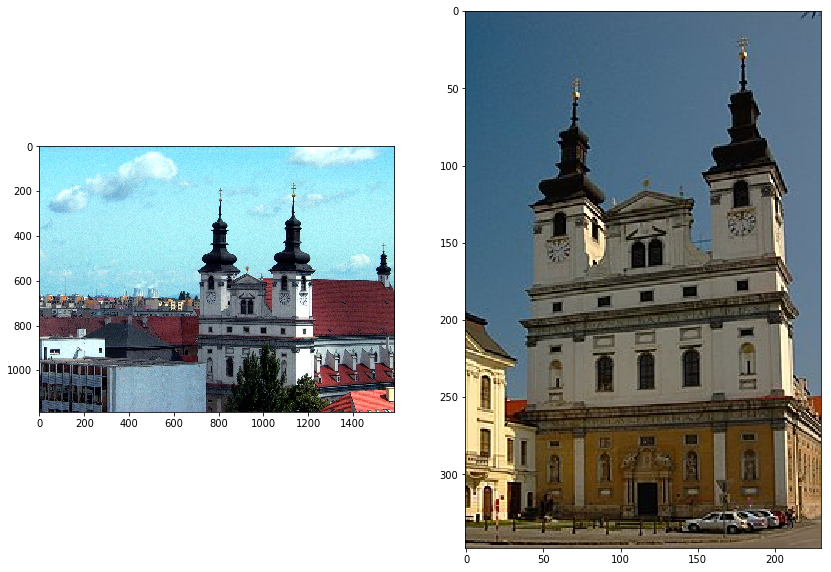

In [9]:
# help here: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html
# https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html

# create BFMatcher object
# matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1, des2) # query_image, train_image
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 50 matches.
plt.figure(figsize=(14, 14))
img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

plt.figure(figsize=(14, 14))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()


###  Project 1 - Automatic grading of multiple choice tests

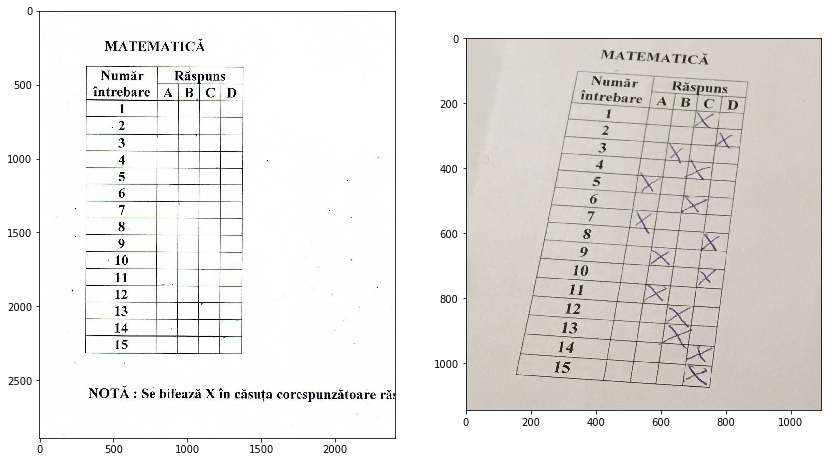

the shape of img_template is (2889, 2401, 3)
the shape of img_query is (1146, 1092, 3)


In [10]:
img_template = cv.imread(base_folder + 'template_math.jpg')
img_query = cv.imread(base_folder + 'test_image_math.jpg')
img_template = cv.cvtColor(img_template, cv.COLOR_BGR2RGB)
img_query = cv.cvtColor(img_query, cv.COLOR_BGR2RGB)
plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(img_template)
plt.subplot(1, 2, 2)
plt.imshow(img_query)
plt.show()

print('the shape of img_template is', img_template.shape)
print('the shape of img_query is', img_query.shape)

In [11]:
points_template = np.float32([(322, 384), (1373, 382), (314, 2304), (1369, 2324)]) # the points of the 4 corners (table) in the template image
points_query = np.float32([(345, 105), (862, 138), (154, 1035), (747, 1075)]) # the points of the 4 corners (table) in the test image

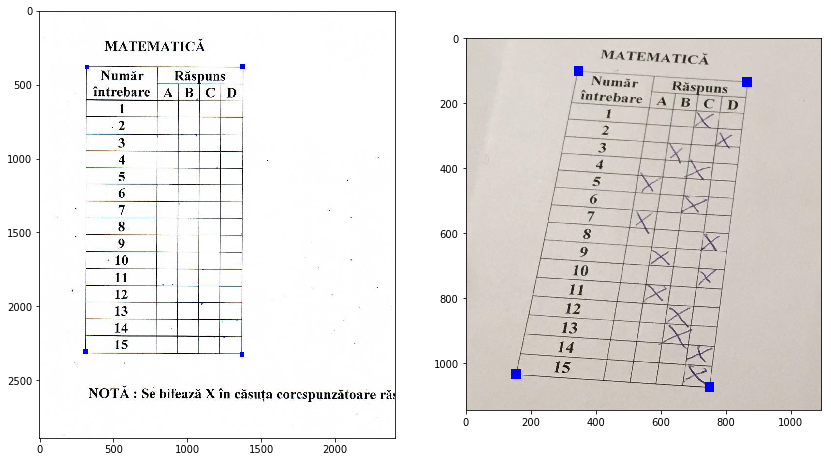

In [12]:
# use it only for plotting the points in the images
img_template_with_points = img_template.copy()
img_query_with_points = img_query.copy()
step = 15
for i in range(len(points_template)): 
    img_template_with_points[int(points_template[i, 1] - step):int(points_template[i, 1] + step), int(points_template[i, 0] - step):int(points_template[i, 0] + step)] = [0, 0, 255]
    img_query_with_points[int(points_query[i, 1] - step):int(points_query[i, 1] + step), int(points_query[i, 0] - step):int(points_query[i, 0] + step)] = [0, 0, 255]

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(img_template_with_points) 
plt.subplot(1, 2, 2)
plt.imshow(img_query_with_points)
plt.show()


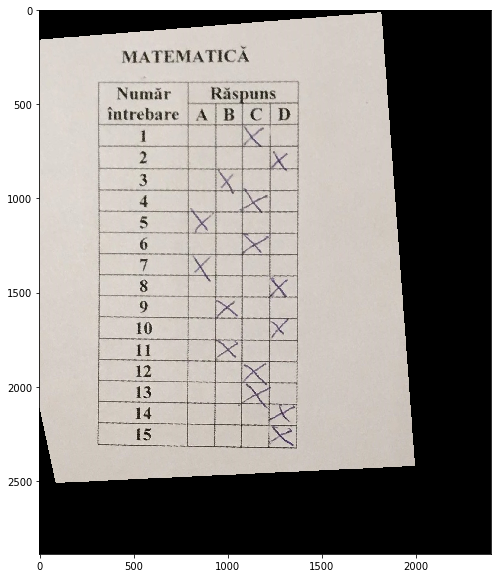

In [13]:
# find the homography given the 8 points
homography = cv.getPerspectiveTransform(points_query, points_template) # first param - the points from the test image
                                                          # the second param - the points from the template image

# use homography to get the aligned image 
height, width, _ = img_template.shape # the shape with respect to the template image
aligned_image2 = cv.warpPerspective(img_query, homography, (width, height), flags=cv.INTER_NEAREST)
plt.figure(figsize=(10, 10))
plt.imshow(aligned_image2); 
plt.show()

In [ ]:
# TODO: find the homography using ORB features